In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Input layer (28x28 pixels → 784)
    Dense(128, activation='relu'),       # Hidden layer 1
    Dense(64, activation='relu'),        # Hidden layer 2
    Dense(10, activation='softmax')      # Output layer (10 classes)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8648 - loss: 0.4575 - val_accuracy: 0.9643 - val_loss: 0.1150
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9665 - loss: 0.1074 - val_accuracy: 0.9767 - val_loss: 0.0856
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9778 - loss: 0.0710 - val_accuracy: 0.9738 - val_loss: 0.0932
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9854 - loss: 0.0476 - val_accuracy: 0.9770 - val_loss: 0.0819
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9869 - loss: 0.0380 - val_accuracy: 0.9790 - val_loss: 0.0782
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9896 - loss: 0.0307 - val_accuracy: 0.9755 - val_loss: 0.0952
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9916 - loss: 0.0243 - val_accuracy: 0.9787 - val_loss: 0.0869
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9913 - loss: 0.023

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.1068
Test Accuracy: 0.9786999821662903


In [9]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [10]:
# Predict the class of the first image in the test set
import numpy as np

In [11]:
index = 0
img = x_test[index]
true_label = np.argmax(y_test[index])
prediction = model.predict(np.expand_dims(img, axis=0))
predicted_label = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


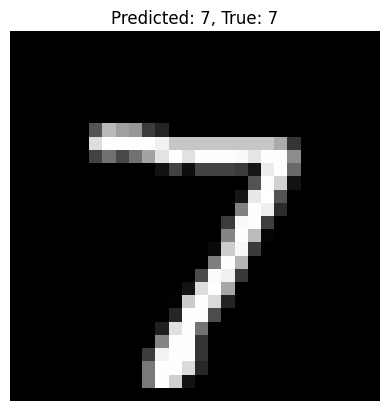

In [12]:
# Show image with predicted and true label
plt.imshow(img, cmap='gray')
plt.title(f'Predicted: {predicted_label}, True: {true_label}')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


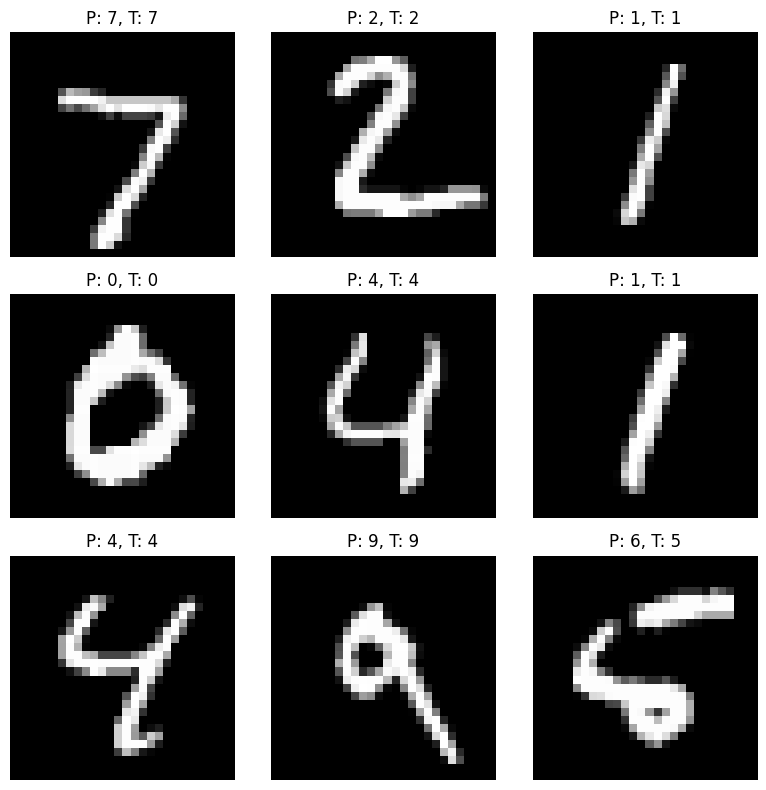

In [13]:
# Show first 9 predictions
plt.figure(figsize=(8,8))
for i in range(9):
    img = x_test[i]
    prediction = model.predict(np.expand_dims(img, axis=0))
    predicted_label = np.argmax(prediction)
    true_label = np.argmax(y_test[i])

    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"P: {predicted_label}, T: {true_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

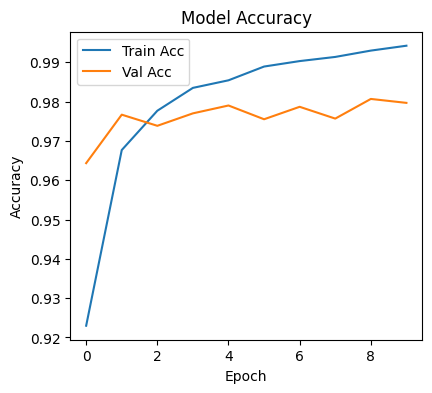

In [15]:
# Plot training & validation accuracy
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

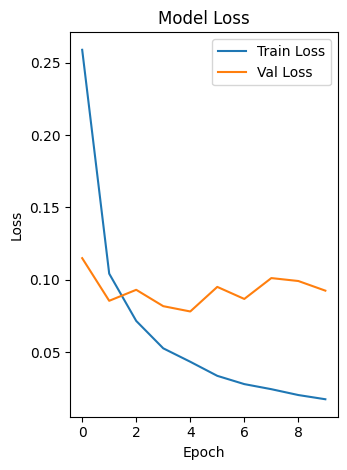

In [17]:
# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()